In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [7]:
# Functions:

from numpy import sin, cos
from numpy import exp
from numpy import pi
from numpy import sqrt
from numpy import e
from numpy import absolute

def ros2(x1, x2): 
  return 100*(x2-x1**2)**2+(x1-1)**2

def easom(x, y):
 return -cos(x) * cos(y) * exp(-((x - pi)**2 + (y - pi)**2))

def ackley(x, y):
 return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

def himmelblau(x, y):
 return (x**2 + y - 11)**2 + (x + y**2 -7)**2

def holder(x, y):
 return -absolute(sin(x) * cos(y) * exp(absolute(1 - (sqrt(x**2 + y**2)/pi))))

In [8]:
def plot_function_landscape(f):
  x1 = np.linspace(-100, 100)
  x2 = np.linspace(-100, 100)
  X1, X2 = np.meshgrid(x1, x2)
  F = f(x1, x2)
  plt.contour(X1, X2, f(X1, X2))

def plot_patterns(patterns):
  plt.scatter(x=patterns['x1'],y=patterns['x2'], color="red", marker="*") 

def plot_elite(elite):
  plt.scatter(x=elite['x1'],y=elite['x2'], color="green") 

def get_color(tag):
  if tag==1:
    return "red"
  elif tag==2:
    return "green"
  elif tag==3:
    return "blue"

def plot_clusters(cluster):
  colors = [get_color(t) for t in cluster['tag']]
  plt.scatter(x=cluster['x1'],y=cluster['x2'], color=colors) 
  
def plot_generation(gen, f):
  plot_function_landscape(f)
  plt.scatter(x=gen['x1'],y=gen['x2'],c='DarkBlue')

In [10]:
def load_gen(genid):
  pop = pd.read_csv("/content/pop-g" + str(genid) + ".csv", sep=";")
  return pop

def load_patt(genid):
  patt = pd.read_csv("/content/patterns-g" + str(genid) + ".csv", sep=";")
  return patt

def load_elite(genid):
  elite = pd.read_csv("/content/elite-g" + str(genid) + ".csv", sep=";")
  return elite

def load_clusters(genid):
  clusters = pd.read_csv("/content/clusters-g" + str(genid) + ".csv", sep=";")
  return clusters

def load_dm_generations(max_gen):
  generations = {}
  patterns = {}
  elites = {}
  clusters = {}

  for i in range(1, max_gen+1):
    gen = load_gen(i) 
    generations[str(i)] = gen

    patt = load_patt(i)
    patterns[str(i)] = patt

    elite = load_elite(i)
    elites[str(i)] = elite

    cluster = load_clusters(i)
    clusters[str(i)] = cluster
  
  return generations, patterns, elites, clusters

def load_generations(max_gen):
  generations = {}
  patterns = {}
  elites = {}
  clusters = {}

  for i in range(1, max_gen+1):
    gen = load_gen(i) 
    generations[str(i)] = gen
  
  return generations

In [11]:
generations = load_generations(145)

In [19]:
generations, patterns, elite, clusters = load_generations(145)

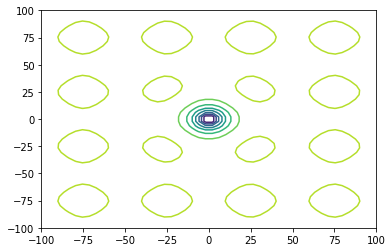

In [5]:
plot_function_landscape(ackley)

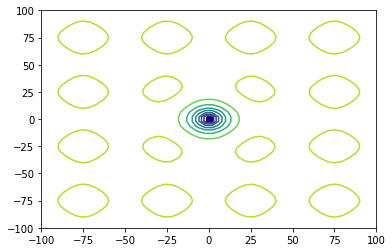

In [17]:
gen = "50"
plot_generation(generations[gen], ackley)
#plot_patterns(patterns[gen])
#plot_elite(elite[gen])
#plot_clusters(clusters[gen])